# This is the GW II, 5th model.

The Near-Future Climate Model. 

Rising CO2, radiative forcing, time-evolving response.

![title](modelblackboard.png)

This model is based on current data as of 2015. The model works as follows (I'm copying almost directly from the Coursera course [here](https://www.coursera.org/learn/global-warming-model/supplement/oFgve/description-of-the-model-formulation) and make no claims about originality!)

We're trying to simulate the near-term future of Earth's climate as a function of three main uncertainties:
* future CO2 emission
* climate sensitivity
* current cooling impact of industrial aerosols and short-lived greenhouse gases (the masking effect).

In [24]:
import numpy as np
from matplotlib import pyplot as plt
from ipywidgets import interact, fixed

In [38]:
def plotModel(humansDie=2015, climateSensitivity2x=3, aerosol_Wm2_now = -0.75):
    timestep = 1 #years
    eqCO2 = 280
    initCO2 = 290
    CO2_exp = 0.0225
    CO2RampExp = 0.01 # How quickly things ramp down without us
    #aerosol_Wm2_now = -0.75
    watts_m2_2x = 4
    # This means 3 degrees per doubling of CO2
    #climateSensitivity2x = 3
    climateSensitivityWm2 = climateSensitivity2x / watts_m2_2x
    TResponseTime = 20

    years = [1900]
    bauCO2 = [ initCO2 ] #business as usual
    incCO2 = [0]
    rfCO2 = [0]
    rfMask = [0]
    rfCO2Ramp = [0]
    rfMaskRamp = [0]
    rfTot = [0]
    Teq = [0]
    TTrans = [0]
    rampCO2 = [initCO2]
    rfTotRamp = [0]
    TeqRamp = [0]
    TTransRamp = [0]

    # business

    while years[-1] < 2100:
        years.append (years[-1] + timestep)
        bauCO2.append( eqCO2 + (bauCO2[-1]-eqCO2)*(1 + CO2_exp * timestep) )
        incCO2.append( (bauCO2[-1] - bauCO2[-2]) / timestep )
        # The factor with log(2) is giving the number of doublings.
        rfCO2.append( watts_m2_2x*np.log(bauCO2[-1]/eqCO2 ) / np.log(2) )

    iDie = years.index(humansDie)
    aerosolCoeff = aerosol_Wm2_now/( (bauCO2[iDie] - bauCO2[iDie - 1])/timestep )
    for i in range(1,len(years)):
        rfMask.append( max(incCO2[i]*aerosolCoeff, aerosol_Wm2_now))
        rfTot.append(rfCO2[i] * climateSensitivityWm2)
        Teq.append(rfTot[i] * climateSensitivityWm2)
        TTrans.append( TTrans[-1] + (Teq[i] - TTrans[-1]) * timestep/TResponseTime)
    #rampdown
    for i in range(1, iDie):
        rampCO2.append(bauCO2[i])
        rfCO2Ramp.append(rfCO2[i])
        rfMaskRamp.append(rfMask[i])
        TTransRamp.append(TTrans[i])
        TeqRamp.append(Teq[i])
        rfTotRamp.append(rfTot[i])
    for i in range(iDie, len(years)):
        rampCO2.append(rampCO2[-1] + (eqCO2*1.2 - rampCO2[-1])*(CO2RampExp*timestep))
        rfCO2Ramp.append(watts_m2_2x*np.log(rampCO2[i]/eqCO2)/np.log(2))
        rfMaskRamp.append(0)
        rfTotRamp.append(rfCO2Ramp[i])
        TeqRamp.append(rfCO2Ramp[i]*climateSensitivityWm2)
        TTransRamp.append(TTransRamp[-1] + (TeqRamp[i] - TTransRamp[-1])*timestep/TResponseTime)

    fig = plt.figure()
    plt.plot(years,bauCO2,'-',label='CO2 (business as usual)')
    plt.plot(years,rampCO2,'-',label='CO2 (world without us)');
    plt.ylabel('CO2')
    plt.xlabel('year')
    plt.legend()
    fig = plt.figure()
    plt.plot(years,rfTot,'-',label='Total radiative forcing');
    plt.plot(years,rfTotRamp,'-',label='Total radiative forcing without us');
    plt.plot(years,rfMaskRamp,'-',label='Radiative forcing for Masking');
    plt.ylabel('Radiative forcing')
    plt.xlabel('year')
    
    plt.legend()
    fig = plt.figure()
    plt.plot(years,TTrans,'-',label='Business As usual');
    plt.plot(years,TTransRamp,'-',label='Life without us');
    plt.ylabel('Temperature change')
    plt.xlabel('year')
    plt.legend();

interact(plotModel,humansDie=(2015,2100),
        climateSensitivity2x=(1,5,0.1),
        aerosol_Wm2_now = (-2.0,0.1,0.1))

interactive(children=(IntSlider(value=2015, description='humansDie', max=2100, min=2015), FloatSlider(value=3.…

<function __main__.plotModel(humansDie=2015, climateSensitivity2x=3, aerosol_Wm2_now=-0.75)>

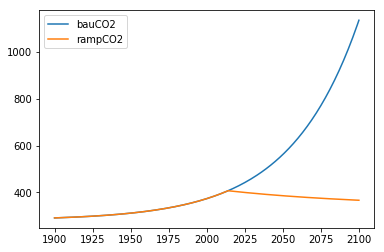

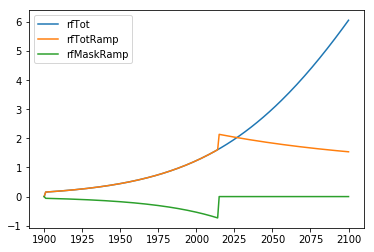

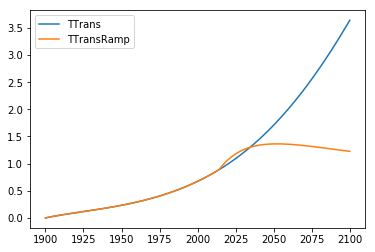

In [20]:
timestep = 1 #years
eqCO2 = 280
initCO2 = 290
CO2_exp = 0.0225
CO2RampExp = 0.01
aerosol_Wm2_now = -0.75
watts_m2_2x = 4
climateSensitivity2x = 3
climateSensitivityWm2 = climateSensitivity2x / watts_m2_2x
TResponseTime = 20

years = [1900]
bauCO2 = [ initCO2 ] #business as usual
incCO2 = [0]
rfCO2 = [0]
rfMask = [0]
rfCO2Ramp = [0]
rfMaskRamp = [0]
rfTot = [0]
Teq = [0]
TTrans = [0]
rampCO2 = [initCO2]
rfTotRamp = [0]
TeqRamp = [0]
TTransRamp = [0]

# business

while years[-1] < 2100:
    years.append (years[-1] + timestep)
    bauCO2.append( eqCO2 + (bauCO2[-1]-eqCO2)*(1 + CO2_exp * timestep) )
    incCO2.append( (bauCO2[-1] - bauCO2[-2]) / timestep )
    rfCO2.append( watts_m2_2x*np.log(bauCO2[-1]/eqCO2 ) / np.log(2) )

i2015 = years.index(2015)
aerosolCoeff = aerosol_Wm2_now/( (bauCO2[i2015] - bauCO2[i2015 - 1])/timestep )
for i in range(1,len(years)):
    rfMask.append( max(incCO2[i]*aerosolCoeff, aerosol_Wm2_now))
    rfTot.append(rfCO2[i] * climateSensitivityWm2)
    Teq.append(rfTot[i] * climateSensitivityWm2)
    TTrans.append( TTrans[-1] + (Teq[i] - TTrans[-1]) * timestep/TResponseTime)
#rampdown
for i in range(1, i2015):
    rampCO2.append(bauCO2[i])
    rfCO2Ramp.append(rfCO2[i])
    rfMaskRamp.append(rfMask[i])
    TTransRamp.append(TTrans[i])
    TeqRamp.append(Teq[i])
    rfTotRamp.append(rfTot[i])
for i in range(i2015, len(years)):
    rampCO2.append(rampCO2[-1] + (eqCO2*1.2 - rampCO2[-1])*(CO2RampExp*timestep))
    rfCO2Ramp.append(watts_m2_2x*np.log(rampCO2[i]/eqCO2)/np.log(2))
    rfMaskRamp.append(0)
    rfTotRamp.append(rfCO2Ramp[i])
    TeqRamp.append(rfCO2Ramp[i]*climateSensitivityWm2)
    TTransRamp.append(TTransRamp[-1] + (TeqRamp[i] - TTransRamp[-1])*timestep/TResponseTime)
    
fig = plt.figure()
plt.plot(years,bauCO2,'-',label='bauCO2')
plt.plot(years,rampCO2,'-',label='rampCO2');
plt.legend()
fig = plt.figure()
plt.plot(years,rfTot,'-',label='rfTot');
plt.plot(years,rfTotRamp,'-',label='rfTotRamp');
plt.plot(years,rfMaskRamp,'-',label='rfMaskRamp');
plt.legend()
fig = plt.figure()
plt.plot(years,TTrans,'-',label='TTrans');
plt.plot(years,TTransRamp,'-',label='TTransRamp');
plt.legend();

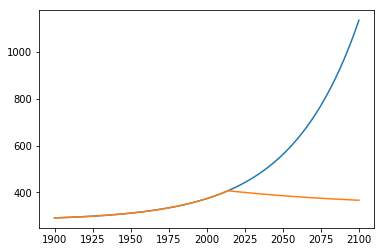

In [15]:
plt.plot(years,bauCO2,'-',label='bauCO2')
plt.plot(years,rampCO2,'-',label='rampCO2');

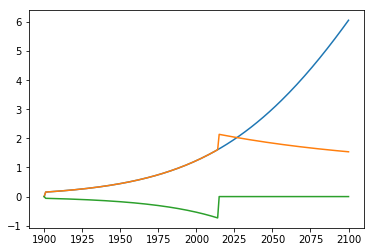

In [16]:
plt.plot(years,rfTot,'-',label='rfTot');
plt.plot(years,rfTotRamp,'-',label='rfTotRamp');
plt.plot(years,rfMaskRamp,'-',label='rfMaskRamp');

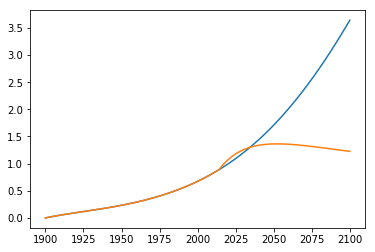

In [17]:
plt.plot(years,TTrans,'-',label='TTrans');
plt.plot(years,TTransRamp,'-',label='TTransRamp');